# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Общая информация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

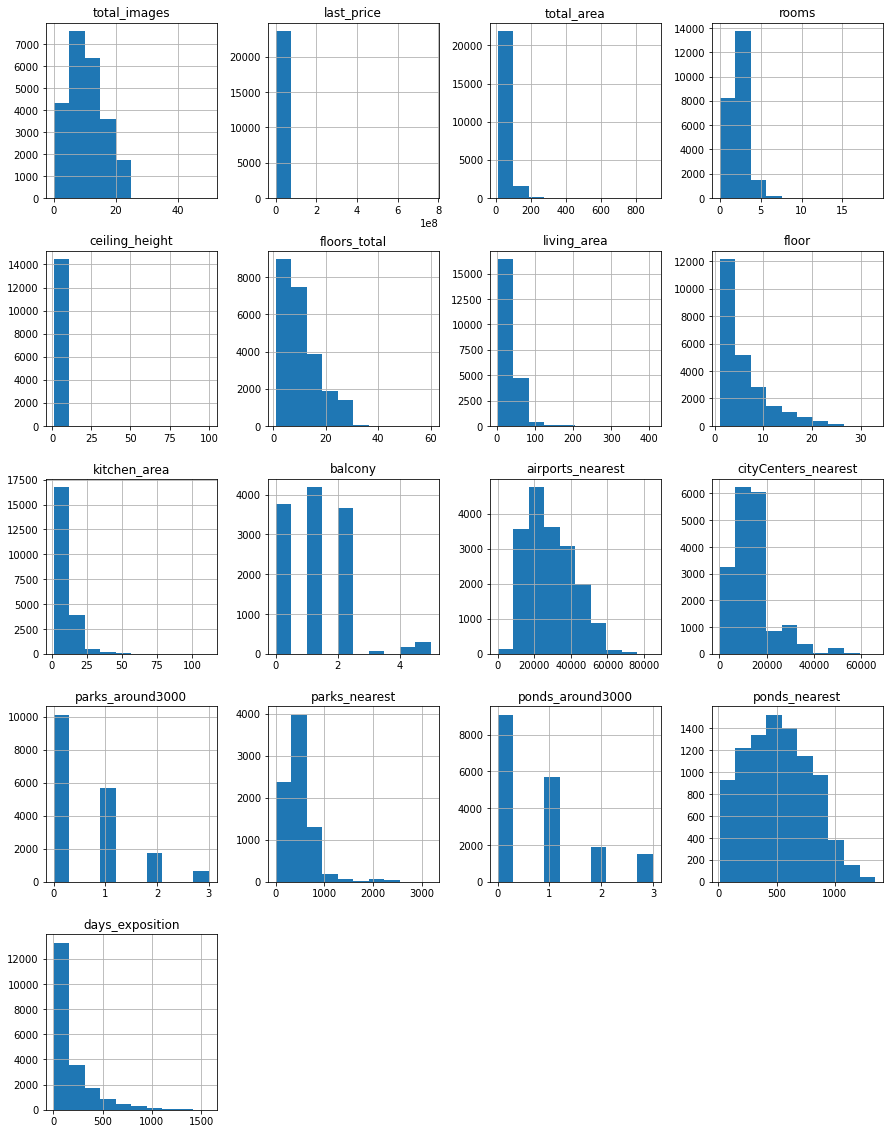

In [4]:
df.hist(figsize=(15, 20));

По некоторым гистограммам выше довольно сложно судить о распределении из-за того, что некоторые значения сильно больше основной массы, но при этом их очень мало. Нужно выяснить аномальны ли они и/или выбрать диапазон, исключающий очень большие значения. 

### Предобработка данных

2.1. Всего 23699 строк. Есть пропуски в следующих столбцах: 

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# Пропорция строк с отсутствующим locality_name к общему количеству строк
49/23699

0.002067597788936242

In [7]:
# Еще раз посмотрим много ли пропусков в столбце locality_name
df = df[df['locality_name'].notna()]
df.shape

(23650, 22)

В самом столбце locality_name не много пропусков, но при этом есть населенные пункты, где полностью отсутствуют значения "картографических столбцов":

In [8]:
# Примеры, где все картографические столбцы имеют значения None 
#df[df['locality_name'] == 'городской посёлок Янино-1'].info()
df[df['locality_name'] == 'посёлок Мурино'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 8 to 23638
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          522 non-null    int64  
 1   last_price            522 non-null    float64
 2   total_area            522 non-null    float64
 3   first_day_exposition  522 non-null    object 
 4   rooms                 522 non-null    int64  
 5   ceiling_height        200 non-null    float64
 6   floors_total          520 non-null    float64
 7   living_area           461 non-null    float64
 8   floor                 522 non-null    int64  
 9   is_apartment          54 non-null     object 
 10  studio                522 non-null    bool   
 11  open_plan             522 non-null    bool   
 12  kitchen_area          422 non-null    float64
 13  balcony               280 non-null    float64
 14  locality_name         522 non-null    object 
 15  airports_nearest     

In [9]:
# Изменим None на 0
df.loc[df['balcony'].isna(), 'balcony'] = 0.0
# Изменим None на False
df.loc[df['is_apartment'].isna(), 'is_apartment'] = False

Пропуски в стоблах можно объяснить разными причинами, например, в столцах ceiling_height, living_area и других, связанных с размерами, человек мог не знать их значений, не знать как их посчитать или счел не важным их заполнять. Заполнить их довольно сложно. 

Но можно предположить, что если нет значений в столбце balony или is_apartment, то это значит, что балкон в жилье отсутствует или жилье не является апартаментами, соответственно. И вместо отсутсвующих значений можно поставить False. 

Есть определенная закономерность в столбцах с отсутствующими значениями с картографическими данными. Встречаются строки, где нет значений сразу в нескольких "картогрфических" столбцах - airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest. 
Это можно объяснить ошибками при создании этой таблицы, следует обратиться к людям, приславшим файл. 

Столбец locality_name довольно важен, возможно следует отфильтровать строки, где значение locality_name отсутсвует, тем более что их всего 0.002% от всех строк в таблице. 

В столцах parks_nearest и ponds_nearest самое большое количество отсутствующих значений, 15620 и 14589, соответсвенно. Возможно, это значит, что в пределах 3км от объекта нет ни парка, ни водоема.

In [10]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isna().sum()

0

In [11]:
# 2.2. Изменим тип столбца first_day_exposition на datetime
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

Используя специальный тип данных datetime можно применять арифметические операции. 

In [12]:
# 2.3. Избавимся от неявных дубликатов
df['locality_name'].nunique()

364

In [13]:
# Посмотрим на уникальные значения в locality_name
locality_name = list(df['locality_name'].unique())
locality_name.sort()
locality_name

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Создадим новый столбец locality_name_shorten у добавим в него населенные пункты без обозначения типа населенного пункта так мы избавимся от 1) дубликатов по типу "поселок" и "посёлок" 2) дубликатов, где один и тот же населенный пункт обозначают, например, как поселок городского типа в одном случае и городской поселок в другом.

In [14]:
df['locality_name_shorten'] = df['locality_name']
df['locality_name_shorten'] = df['locality_name_shorten'].str.replace('поселок городского типа ','')
df['locality_name_shorten'] = df['locality_name_shorten'].str.replace('поселок станции ','')
df['locality_name_shorten'] = df['locality_name_shorten'].str.replace('посёлок городского типа ','')
df['locality_name_shorten'] = df['locality_name_shorten'].str.replace('посёлок при железнодорожной станции ','')
df['locality_name_shorten'] = df['locality_name_shorten'].str.replace('посёлок станции ','')
df['locality_name_shorten'] = df['locality_name_shorten'].str.replace('городской поселок ','')
df['locality_name_shorten'] = df['locality_name_shorten'].str.replace('городской посёлок ','')
df['locality_name_shorten'] = df['locality_name_shorten'].str.replace('деревня ','')
df['locality_name_shorten'] = df['locality_name_shorten'].str.replace('поселок ','')
df['locality_name_shorten'] = df['locality_name_shorten'].str.replace('посёлок ','')
df['locality_name_shorten'] = df['locality_name_shorten'].str.replace('садоводческое некоммерческое товарищество ','')
df['locality_name_shorten'] = df['locality_name_shorten'].str.replace('садовое товарищество ','')
df['locality_name_shorten'] = df['locality_name_shorten'].str.replace('село ','')
df['locality_name_shorten'] = df['locality_name_shorten'].str.replace('имени ','')
df['locality_name_shorten'] = df['locality_name_shorten'].str.replace('коттеджный ','')
df['locality_name_shorten'].nunique()

305

In [15]:
locality_name_shorten = list(df['locality_name_shorten'].unique())
locality_name_shorten.sort()
locality_name_shorten

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',

In [16]:
364/305

1.1934426229508197

Примерно на 20% уменьшилось количество неявных дубликтов. 

В сокращенной версии (после удаления типа населеного пункта) остались такие возможные дубликаты:
- Жилпосёлок и Жилгородок
- Кингисепп и Кингисеппский
- Коммунар и Коммунары
- Русско и Русско-Высоцкое

Их разрешение потребует отдельного топонимического исследования, что выходит за рамки данного проекта. 

In [17]:
df.shape

(23650, 23)

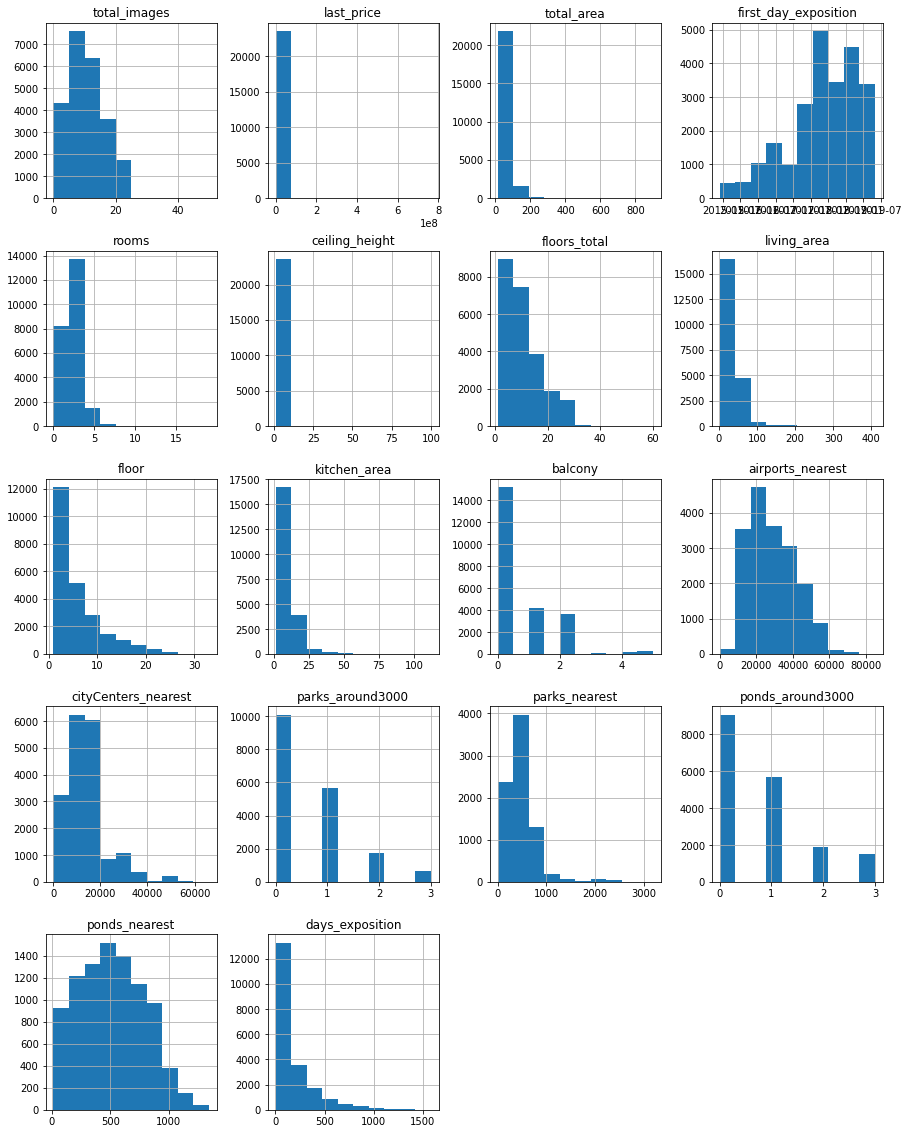

In [18]:
# Редкие и выбивающиеся значения (аномалии)
df.hist(figsize=(15, 20));

In [19]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23565.000000,21752.000000,23650.000000,21381.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.724311,10.675875,34.448356,5.893277,10.566403,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,0.989255,6.594823,22.037664,4.883317,5.901753,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [20]:
# посмотрим какие значения есть в столбце ceiling_height
arr = df['ceiling_height'].unique()
arr.sort(axis=0)
arr

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

1) Вряд ли есть жилье с вытой потолка 1 метр - их можно удалить. 
2) Есть значения, к примеру, 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м
3) Есть значение 100м, его тоже удалим (отфильтруем).

In [21]:
df = df[df['ceiling_height'] > 1.3] 

In [22]:
df.shape

(23648, 23)

In [23]:
# один объект с выстой потолка 100 метров, даже если предположить, что имели в виду 10м, 
# то выглядит странным, отфильтруем его
df = df[df['ceiling_height'] != 100]

In [24]:
df.shape

(23647, 23)

In [25]:
df[df['ceiling_height'] > 5.6]['ceiling_height'].value_counts()

27.0    8
25.0    7
8.0     3
32.0    2
14.0    1
20.0    1
24.0    1
27.5    1
5.8     1
10.3    1
8.3     1
6.0     1
22.6    1
26.0    1
Name: ceiling_height, dtype: int64

In [26]:
# Возможно есть жилье с высотой потолка 5.6 метра, но все, что выше - делим на 10 и смотрим,  
# в разумных ли пределах (от 1.75 до 5 метров) полученное число, 
# если да - то оставляем его, если нет - заменяем на None
def get_ceiling_height(height):
    if height > 5.6:
        if (height / 10) > 2:
            return round((height / 10), 2)
        else:
            return np.nan
    else: 
        return height
        
df.loc[:, 'ceiling_height'] = df.loc[:, 'ceiling_height'].apply(get_ceiling_height)

In [27]:
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_shorten
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Парголово
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,Санкт-Петербург


In [28]:
df[df['ceiling_height'] > 5.6]['ceiling_height'].value_counts()

Series([], Name: ceiling_height, dtype: int64)

In [29]:
len(df[df['ceiling_height'].isna()])


9

In [30]:
# если жилая площадь составляет меньше 20% от общей, 
# то будем считать это не нормальным и удилим такие объявления
df['living_area'] = df['living_area'].where(
    df['living_area'] / df['total_area'] > 0.2, np.nan
)

Довольно много отсутствующих значений в столбцах высоты потолка и площади. В таблице собраны объявления о продаже квартир т.е. жилых помещений, при этом в столбце living_area встречаются значения и 2 кв. метра, что весьма странно, поэтому, если жилая площадь составляет меньше 20% от общей, то заменим эти значения на np.nan

Мы определили в каких столбцах есть отсутствующие значения и сколько их. Порассуждали над природой пропусков, это может быть и человеческий фактор и несовершеннство программ. Там где возможно, изменили значения на более подходящие, как например, в столбце ceiling_height. Также, мы на 20% сократили число неявнях дубликатов в столбце locality_name. 

In [31]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23647.000000,2.364700e+04,23647.000000,23647.000000,23638.000000,23562.000000,21729.000000,23647.000000,21378.000000,23647.000000,18114.000000,18137.000000,18138.000000,8062.000000,18138.000000,9083.000000,20467.000000
mean,9.862689,6.541005e+06,60.331530,2.070157,2.696495,10.676428,34.470175,5.893475,10.566660,0.591576,28802.651209,14198.185808,0.611479,490.888489,0.769489,518.138831,180.766014
std,5.682049,1.089690e+07,35.663131,1.078666,0.219170,6.594892,22.033872,4.883514,5.902051,0.959279,12637.889479,8607.192785,0.801976,342.576800,0.937809,277.814717,219.787484
min,0.000000,1.219000e+04,12.000000,0.000000,1.750000,1.000000,5.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.250000,9241.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26755.500000,13105.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.705000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,5.600000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Изучим аномальные значения в столбце last_price**

Самое дорогое жилье стоит 763млн рублей (то, что с высотой потолка 100метров), при этом 75 перцентиль всего на уровне 6,7млн рублей 

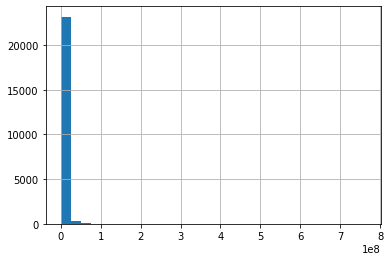

In [32]:
# По такой гистограмме ничего не понятно
df['last_price'].hist(bins=30);

316

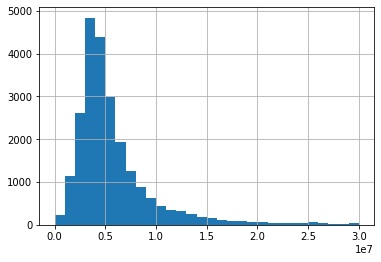

In [33]:
# Попробуем сделать меньше диапазон
df['last_price'].hist(bins=30, range=(0, 30000000));
(df['last_price'] > 30000000).sum()

In [34]:
(df['last_price'] > 30000000).sum() / df.shape[0]

0.013363217321436123

Смело можем отбросить все значения где стоимость жилья больше 30млн рублей - это всего 316 строк или 1,33% от всех строк в датасете. Этого будет достаточно, чтобы аномальные значения не искажали так сильно картину и мы могли нарисовать адекватную гистограмму. 

In [35]:
df = df[df['last_price'] <= 30000000]
df.shape

(23331, 23)

In [36]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23331.000000,2.333100e+04,23331.000000,23331.000000,23323.000000,23247.000000,21452.000000,23331.000000,21096.000000,23331.000000,17810.000000,17830.000000,17831.000000,7832.000000,17831.000000,8838.000000,20229.000000
mean,9.822897,5.740787e+06,58.252534,2.039904,2.691042,10.715791,33.384208,5.902490,10.327511,0.591959,28837.196968,14349.913517,0.597050,493.753447,0.753351,521.797918,179.374710
std,5.657681,4.039686e+06,28.213936,1.029356,0.206855,6.615974,18.478328,4.900279,5.168476,0.957956,12724.997080,8588.398908,0.788369,342.588229,0.925407,278.010944,218.315904
min,0.000000,1.219000e+04,12.000000,0.000000,1.750000,1.000000,5.000000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18488.000000,9556.000000,0.000000,289.750000,0.000000,299.250000,45.000000
50%,9.000000,4.600000e+06,51.500000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26788.500000,13209.500000,0.000000,456.000000,0.000000,505.000000,95.000000
75%,14.000000,6.650000e+06,68.300000,3.000000,2.700000,16.000000,42.000000,8.000000,11.900000,1.000000,37412.000000,16383.000000,1.000000,614.000000,1.000000,733.000000,229.000000
max,50.000000,3.000000e+07,460.800000,16.000000,5.300000,60.000000,279.600000,33.000000,100.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Изучим аномальные значения в столбце rooms**

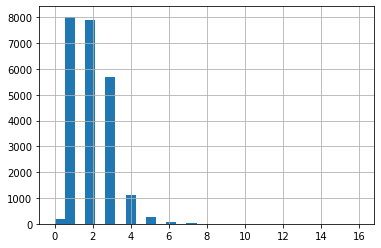

In [37]:
df['rooms'].hist(bins=30);

In [38]:
(df['rooms'] == 0).sum()

196

Интересно, есть 196 объектов с числом комнат 0, возможно это студии. По идее, мы можем считать их однокомнатными.

In [39]:
df['rooms'] = df['rooms'].where(df['rooms'] != 0, 1)

In [40]:
(df['rooms'] == 0).sum()

0

19

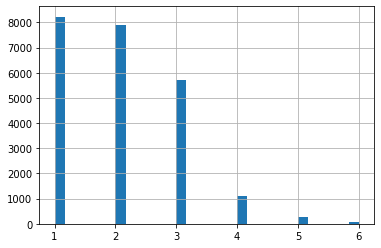

In [41]:
df['rooms'].hist(bins=30, range=(1, 6));
(df['rooms'] > 7).sum()

In [42]:
# Имеем в виду, что мы уже избавились от части датасета анализируя аномально дорогое жилье, где, можно
# предположить было аномально много комнат
(df['rooms'] > 7).sum() / df.shape[0]

0.0008143671510008144

In [43]:
df = df[df['rooms'] <= 7]
df.shape

(23312, 23)

**Изучим аномальные значения в столбце total_area**

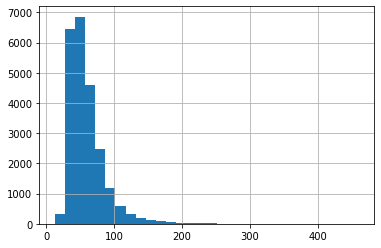

In [44]:
df['total_area'].hist(bins=30);

37

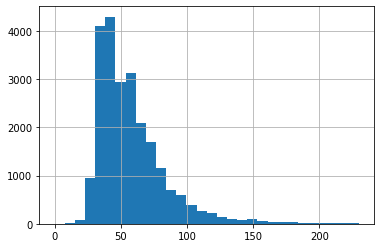

In [45]:
df['total_area'].hist(bins=30, range=(0, 230));
(df['total_area'] > 230).sum()

In [46]:
(df['total_area'] > 230).sum() / df.shape[0]

0.00158716540837337

In [47]:
df = df[df['total_area'] <= 230]
df.shape

(23275, 23)

### Посчитайте и добавьте в таблицу новые столбцы

In [48]:
def get_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floors_total'] > 1 and row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [49]:
df['sq_meter_price'] = (df['last_price'] / df['total_area']).round(2)
df['day_of_week'] = df['first_day_exposition'].dt.dayofweek
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df['floor_type'] = df.apply(get_floor_type, axis=1)
df['city_center_km'] = (df['cityCenters_nearest'] / 1000).round()

In [50]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_shorten,sq_meter_price,day_of_week,month,year,floor_type,city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1,95065.79,0,9,2018,другой,NaN


Добавили в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

### Проведите исследовательский анализ данных

In [51]:
# 4.1
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,day_of_week,month,year,city_center_km
count,23275.000000,2.327500e+04,23275.000000,23275.000000,23267.000000,23191.000000,21402.000000,23275.000000,21045.000000,23275.000000,17755.000000,17775.000000,17776.000000,7796.000000,17776.000000,8809.000000,20185.000000,23275.000000,23275.000000,23275.000000,23275.000000,17775.000000
mean,9.821998,5.700951e+06,57.744994,2.037078,2.690422,10.725842,33.090039,5.905564,10.291409,0.592868,28845.455477,14370.673305,0.595410,494.030528,0.752813,522.121921,179.076641,96393.928708,2.567132,6.401847,2017.375811,14.364163
std,5.655417,3.953556e+06,26.137717,0.982554,0.206072,6.617456,17.375329,4.902357,5.070117,0.958672,12732.191813,8587.075031,0.787032,343.069323,0.924852,277.988900,217.764113,35874.736091,1.788915,3.490559,1.033091,8.595016
min,0.000000,1.219000e+04,12.000000,1.000000,1.750000,1.000000,5.000000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000,111.830000,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.500000,2.000000,7.000000,0.000000,18475.000000,9593.000000,0.000000,290.000000,0.000000,301.000000,45.000000,76256.160000,1.000000,3.000000,2017.000000,10.000000
50%,9.000000,4.600000e+06,51.400000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26815.000000,13222.000000,0.000000,456.000000,0.000000,506.000000,95.000000,94594.590000,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.600000e+06,68.000000,3.000000,2.700000,16.000000,42.000000,8.000000,11.800000,1.000000,37412.000000,16398.000000,1.000000,614.000000,1.000000,733.000000,229.000000,113271.355000,4.000000,10.000000,2018.000000,16.000000
max,50.000000,3.000000e+07,230.000000,7.000000,5.300000,60.000000,167.000000,33.000000,70.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,848484.850000,6.000000,12.000000,2019.000000,66.000000


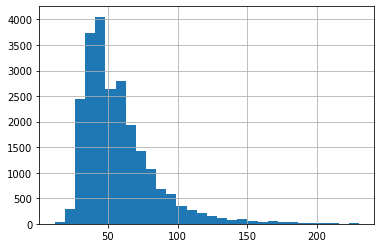

In [52]:
df['total_area'].hist(bins=30);

Это похоже на нормальное распределение, скошенное вправо, что можно объяснить небольшим количеством жилья с общей площадью большей чем основная масса, где средняя площадь равна 50-60кв. метрам. 

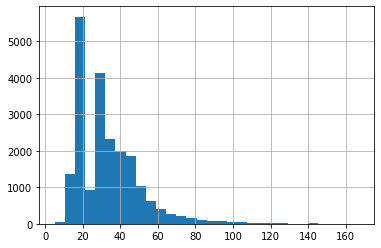

In [53]:
df['living_area'].hist(bins=30);

Это похоже на нормальное распределение, скошенное вправо и с двумя пиками. Это можно объяснить тем, что на рынке основная масса квартир это 1-комнатные или же студии (первый пик) или же 2-комнатные (второй пик) с наиболее распространенными метражами.

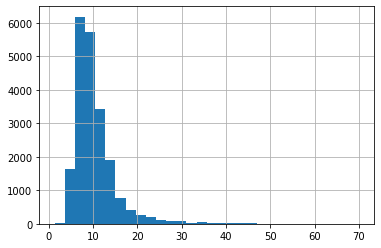

In [54]:
df['kitchen_area'].hist(bins=30);

Это похоже на нормальное распределение, скошенное вправо. Мы видим один пик, что разнится с гистрогаммой по по столбцу living_area, это можно объяснить тем, что и в 1-комнатных и в 2-комнтаных квартирах 1 кухня.

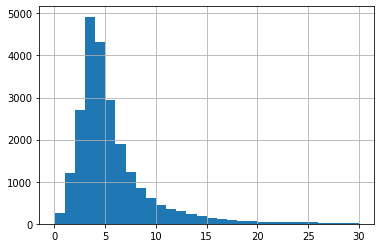

In [55]:
(df['last_price']/1000000).hist(bins=30);

Это похоже на нормальное распределение, скошенное вправо. Это можно объяснить тем, что на рынке основная масса квартир стоит до 10млн рублей, но есть и дороже и чем дороже, тем меньше подобных предложений. 

In [56]:
df['rooms'].unique()

array([3, 1, 2, 4, 5, 6, 7])

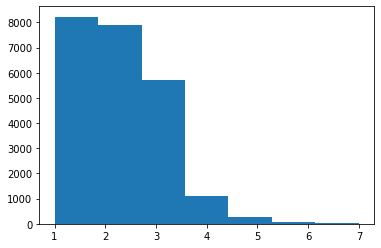

In [57]:
df['rooms'].hist(bins=7, grid=False);

Из графика видим, что большинство объектов это квартиры с 1-ой ,2-я или 3-я комнатами. 

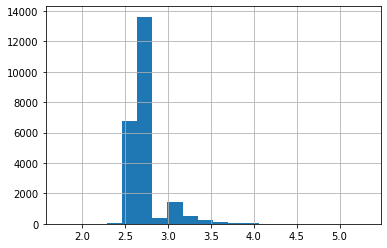

In [58]:
df['ceiling_height'].hist(bins=20);

In [59]:
df[(df['ceiling_height'] > 3.5) | (df['ceiling_height'] < 2)]['ceiling_height'].count()

220

In [60]:
(df['ceiling_height'] > 3.5).sum()

219

In [61]:
(df['ceiling_height'] < 2.4).sum()

20

In [62]:
df[(df['ceiling_height'] > 3.5) | (df['ceiling_height'] < 2)]['ceiling_height'].count() / df.shape[0]

0.00945220193340494

In [63]:
df = df[df['ceiling_height'] > 2.4]
df = df[df['ceiling_height'] <= 3.5]
df.shape

(23004, 29)

In [64]:
df['floor'].nunique()

33

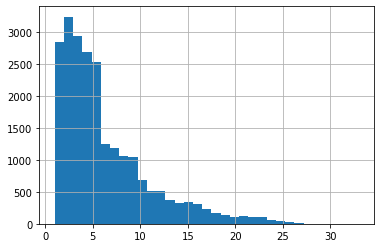

In [65]:
df['floor'].hist(bins=33);

Больше всего объектов жилья на 1-5 этажах, возможно потому, что больше малоэтажных домов, чем многоэтажных в датасете, который включает в себя в том числе и ближний пригород Петербурга.

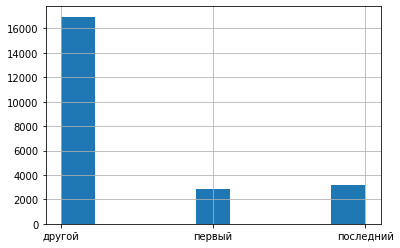

In [66]:
df['floor_type'].hist(bins=9);

Сложно тут что-либо прокомментровать, все очевидно.

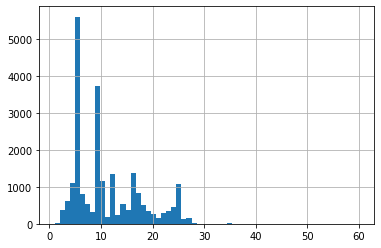

In [67]:
df['floors_total'].hist(bins=60);

Довольно интересный график, можно проследить этажность домов в Санкт-Петербурге и его пригороде: много 5-этажных и 9-этажных зданий.

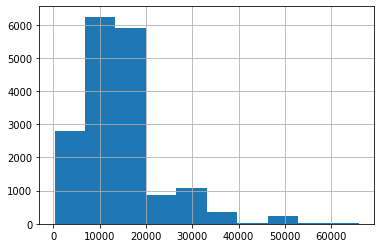

In [68]:
df['cityCenters_nearest'].hist();

Большинство объектов в пределах 20км, большинство домов (66%) расположено в Петербурге, а он город не маленький. 

In [69]:
(df['locality_name'] == 'Санкт-Петербург').sum() / df.shape[0]

0.6579290558163797

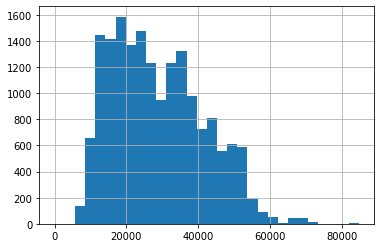

In [70]:
df['airports_nearest'].hist(bins=30);

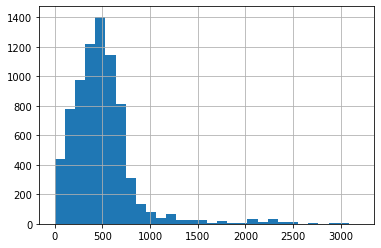

In [71]:
df['parks_nearest'].hist(bins=30);

Большая часть жилья расположено не дальше 1000 метров от парка.

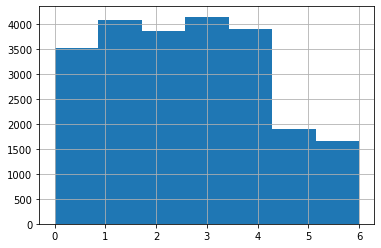

In [72]:
df['day_of_week'].hist(bins=7);

По выходным публикуется меньше объявлений.

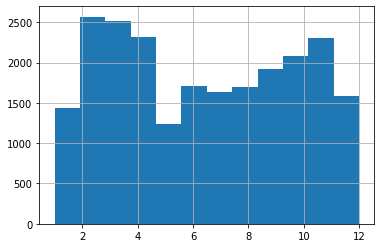

In [73]:
df['month'].hist(bins=12);

Самыми мало публикуемыми месяцами стали декабрь, январь и май, возможно, дело в праздниках.


count    19970.000000
mean       178.581322
std        217.445896
min          1.000000
25%         45.000000
50%         94.000000
75%        227.000000
max       1580.000000
Name: days_exposition, dtype: float64

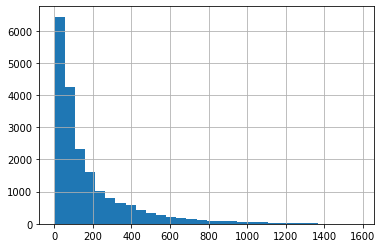

In [74]:
# 4.2
df['days_exposition'].hist(bins=30)
df['days_exposition'].describe()

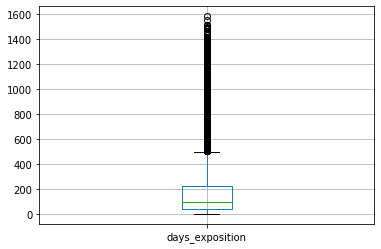

In [75]:
boxplot = df.boxplot(column=['days_exposition'])  

Продажа квартиры в среднем занимает 95 дней (медианное среднее). Если продажа совершена в течение 45 дней с момента публицкации, то можно считать ее быстрой. Если объявление "висит" более 500 дней, то можно сказать, что это необычно долго.

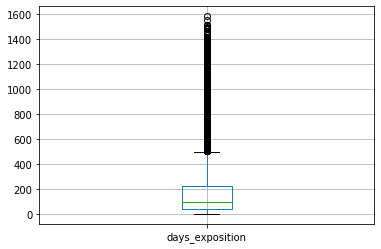

In [76]:
boxplot = df.boxplot(column=['days_exposition'])  

In [77]:
# 4.3 

Для начала рассмотрим как количественные факторы влияют на цену квартиры. 

In [78]:
# построим матрицк корреляции
corr_matrix = df.loc[:, ['last_price', 'total_area', 'kitchen_area', 'rooms', 'day_of_week', 'month', 'year']].corr()
corr_matrix

,last_price,total_area,kitchen_area,rooms,day_of_week,month,year
last_price,1.000000,0.788002,0.604806,0.503128,-0.018659,0.007306,-0.033817
total_area,0.788002,1.000000,0.558857,0.794766,-0.011361,0.011112,-0.079472
kitchen_area,0.604806,0.558857,1.000000,0.188550,-0.010846,0.008902,-0.051804
rooms,0.503128,0.794766,0.188550,1.000000,-0.002285,0.000780,-0.047243
day_of_week,-0.018659,-0.011361,-0.010846,-0.002285,1.000000,0.012096,-0.003609
month,0.007306,0.011112,0.008902,0.000780,0.012096,1.000000,-0.273544
year,-0.033817,-0.079472,-0.051804,-0.047243,-0.003609,-0.273544,1.000000


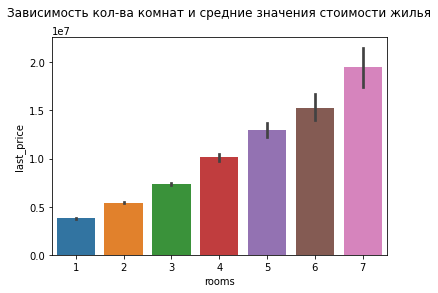

In [79]:
sns.barplot(x=df["rooms"], y=df["last_price"])
plt.title("Зависимость кол-ва комнат и средние значения стоимости жилья\n");

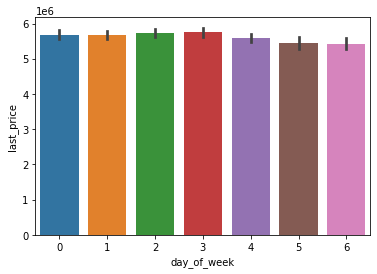

In [80]:
sns.barplot(x=df["day_of_week"], y=df["last_price"]);

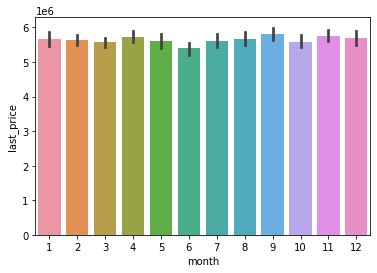

In [81]:
sns.barplot(x=df["month"], y=df["last_price"]);

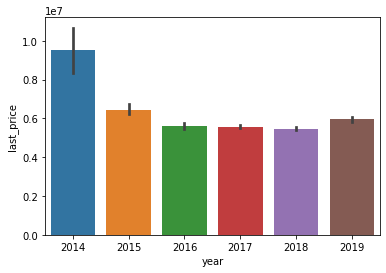

In [82]:
sns.barplot(x=df["year"], y=df["last_price"]);

На графиках видно, что есть прямая зависимость между количетвом комнат и стоимостью жилья. Касательно, дня и месяца публикации нет никакой корреляции. На последнем графике мы видим, что в 2014 средняя стоимость жилья была самой высокой, далее было снижение цен до 2018 года, в 2019 был небольшой подъем. </br>

 

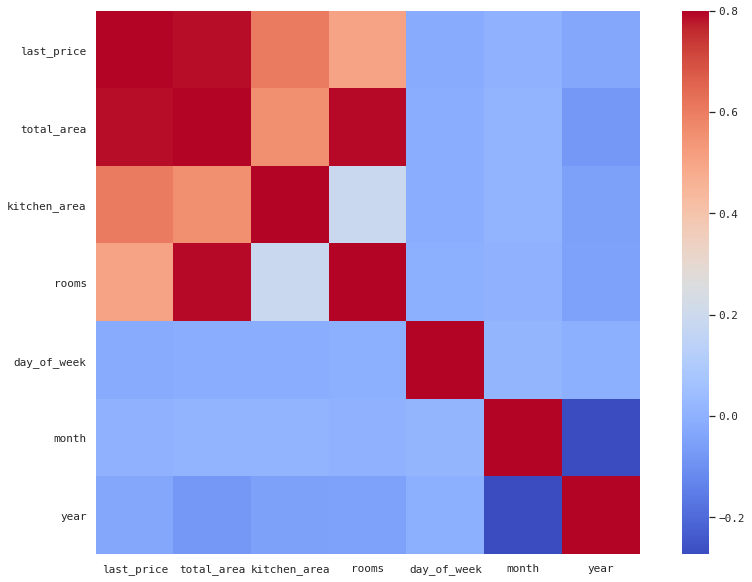

In [83]:
# Изобразим это на графике

sns.set(context="notebook", font="monospace")

f, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr_matrix, vmax=.8, square=True, cmap='coolwarm')
plt.show()

Из таблицы и графика видно, что максимально положительной с ценой коррелируют площади и количество комнат, минимальная корреляция с днями недели и месяцем публикации объявления. Небольшая негативная коррелция с годом публикации. 

Рассмотрим поподробнее зависимость площадей и комнат на цену.

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(16,5))

sns.regplot(x='total_area', y='last_price', data=df, ax=axs[0])
sns.regplot(x='kitchen_area', y='last_price', data=df, ax=axs[1])
sns.regplot(x='rooms',y='last_price', data=df, ax=axs[2])

plt.show()

NameError: name 'plt' is not defined

Рассмотрим как влияет качественный показатель - тип этажа (первый, последний, другой) на цену.

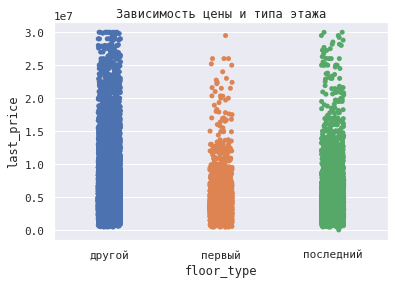

In [85]:
sns.stripplot(x=df["floor_type"], y=df["last_price"],jitter=True)
plt.title("Зависимость цены и типа этажа");

В целом, как и можно было предположить на цену квартиры больше всего влияет ее общая площадь, размер кухни, и практически не влияют день недели и месяц. Слабо негативно проявляется зависимость между ценой и годом публикации. 

Есть некоторая закономерность между ценой и типом этажа квартиры - на первом этаже меньше всего разброс по цене в отличие от квартир на последенем. 

In [86]:
# 4.4

In [87]:
# Топ 10 населенных пунктов по количеству объявлений и 
# средняя цена за кв метр в каждом таком населенном пункте
top10 = df.groupby('locality_name')['sq_meter_price'].count().sort_values(ascending=False)[:10]

In [88]:
df.query('locality_name in @top10.index').groupby('locality_name')['sq_meter_price'].agg('mean')

locality_name
Всеволожск            68617.058810
Выборг                58243.557826
Гатчина               68799.627549
Колпино               75352.475595
Пушкин               102600.116816
Санкт-Петербург      110343.428539
деревня Кудрово       92473.547559
посёлок Мурино        85752.189157
посёлок Парголово     90175.913089
посёлок Шушары        78655.103189
Name: sq_meter_price, dtype: float64

In [89]:
df.groupby('locality_name')['sq_meter_price'].agg('mean').sort_values()

locality_name
деревня Старополье        11206.220000
посёлок станции Свирь     11481.480000
деревня Вахнова Кара      11688.310000
деревня Выскатка          12335.480000
поселок Совхозный         12629.130000
                             ...      
Пушкин                   102600.116816
посёлок Репино           104238.612500
Санкт-Петербург          110343.428539
Зеленогорск              115122.799583
посёлок Лисий Нос        121616.225000
Name: sq_meter_price, Length: 364, dtype: float64

 Населенным пунктом с самой низкой ценой за кв метр является деревня Старополье, а с самой высокой ценой - поселок Лисий Нос.
    

In [90]:
new_top10 = df.groupby('locality_name')['locality_name'].count().sort_values(ascending=False)[:10]
new_top10

locality_name
Санкт-Петербург      15135
посёлок Мурино         522
посёлок Шушары         439
Всеволожск             395
Пушкин                 358
Колпино                336
посёлок Парголово      327
Гатчина                306
деревня Кудрово        299
Выборг                 230
Name: locality_name, dtype: int64

In [91]:
df.query('locality_name in @new_top10.index').groupby('locality_name')['sq_meter_price'].agg('mean').sort_values(ascending=False)

locality_name
Санкт-Петербург      110343.428539
Пушкин               102600.116816
деревня Кудрово       92473.547559
посёлок Парголово     90175.913089
посёлок Мурино        85752.189157
посёлок Шушары        78655.103189
Колпино               75352.475595
Гатчина               68799.627549
Всеволожск            68617.058810
Выборг                58243.557826
Name: sq_meter_price, dtype: float64


<br>Топ1 - Санкт-Петербург, топ10 - Выборг </br>

 

In [92]:
#4.5

In [93]:
price_distance_km = (df.query("locality_name == 'Санкт-Петербург'")
                    .groupby(['city_center_km'])['sq_meter_price']
                    .mean())

<AxesSubplot:xlabel='city_center_km'>

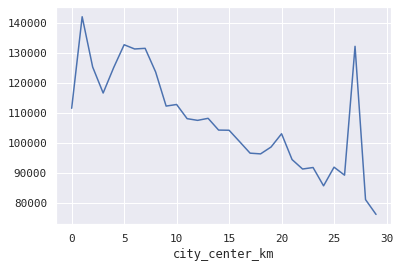

In [94]:
price_distance_km.plot();

На графике видно, что стоимость объектов негативно зависит от расстояния до центра города, чем близе к центру, тем выше цена квадратного метра жилья в г. Санкт-Петербурге. 

### Общий вывод

В данном проекте мы изучили датасет - архив обявлений о продаже жилья. Была изучена общая информация о датасете: сколько всего строк и столбцов, какого типа данные в столбцах, как много пропусков в данных. Попытались поразмышлять о причине пропусков, так где это возможно заполнили их, например, в столбце ceiling_height мы изменили значения типа 27м и 32м на 2.7м и 3.2м, соответственно. Там же где невозможно установить разумные значения, например, 1м или 100м - такие строки убрали (отфильтровали) из датасета. 
Сокртили количество неявных дубликатов в locality_name на 20%. Изменили, тип данных в столбце first_day_exposition на datetime. 

Далее, были добавлены новые столбцы: 
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

В шаге 4 мы построили гистограммы, что посмотреть распределение значений по многим параметрам. Практически по всем количественным параметрам нормальное распределение и это было ожидаемо. Также мы увидели, что на выходных публикуется меньше объявлений, а самым мало публикуемыми месяцами стали декабрь, январь и май, возможно дело в праздниках.

Мы выяснили, что продажа квартиры в среднем занимает 95 дней (медианное среднее). Если продажа совершена в течение 45 дней с момента публицкации, то можно считать ее быстрой. Если объявление "висит" более 500 дней, то можно сказать, что это необычно долго.

Наконец, мы проанализировали зависимость цены квартиры и количественных параметров (таких как общая площадь, площадь кухни, количества комнат), а также номинальных параметров - тип этажа, день, месяц и год публикации. Изобразили на графике, что максимально положительно с ценой коррелируют площади и количество комнат. Нет корреляции между средней стоимостью жилья и днем, месяцем публикации, но есть нисходящий тренд по годам и средней цене. Есть некоторая закономерность между ценой и типом этажа квартиры - на первом этаже меньше всего разброс по цене в отличие от квартир на последенем.

В конце мы выяснили, что населенным пунктом с самой низкой ценой за кв метр из топ 10 по количеству объявлений является Выборг, а с самой высокой ценой - Санкт-Петербург.
 